In [32]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics

from scipy.io import arff

import matplotlib as mpl
import matplotlib.pyplot as plt

from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold

from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import InterclusterDistance
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.features.pca import PCADecomposition

from sklearn import decomposition
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model


In [51]:
#     Unsupervised learning
#     k-means clustering
#     Expectation Maximization

##loading wine data ..
file = "wine.arff"
data = arff.loadarff(file)
df = pd.DataFrame(data[0])

features = ['fixed_acidity',  'pH', 'residual_sugar', 'volatile_acidity',  
'citric_acid',  'chlorides', 'free_sulfur_dioxide',  
'total_sulfur_dioxide',  'density',  'sulphates', 'alcohol']



x_features = df[features]
y_predict = df.quality

x_train, x_test, y_train, y_test = train_test_split(x_features, y_predict, test_size=0.3, random_state=40)

num_of_comp = len(x_train.columns)

x_train_list = np.array(x_train.values.tolist())
y_train_list = np.array(y_train.values.tolist()).astype(int)

x_test_list = np.array(x_test.values.tolist())
y_test_list = np.array(y_test.values.tolist()).astype(int)


def get_eigen_value(pca, X):
    
    # We center the data and compute the sample covariance matrix.
    X_centered = X - np.mean(X, axis=0)
    cov_matrix = np.dot(X_centered.T, X_centered) / len(X)
    eigenvalues = pca.explained_variance_
    for eigenvalue, eigenvector in zip(eigenvalues, pca.components_):    
        print(np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)))
        print(eigenvalue)

__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++ 2	0.15s	457405	0.041	0.050	0.046	0.055	0.045	0.607
k-means++ 3	0.14s	260276	0.045	0.031	0.036	0.034	0.035	0.520
k-means++ 4	0.41s	189238	0.054	0.032	0.040	0.029	0.039	0.489
k-means++ 5	0.41s	148807	0.057	0.027	0.037	0.025	0.035	0.429
k-means++ 6	0.26s	124430	0.058	0.027	0.037	0.023	0.035	0.425
k-means++ 7	0.24s	105332	0.058	0.024	0.034	0.018	0.031	0.386
k-means++ 8	0.27s	91711	0.068	0.026	0.037	0.021	0.035	0.390
k-means++ 9	0.26s	79698	0.062	0.022	0.033	0.018	0.030	0.380
k-means++ 10	0.30s	69001	0.066	0.023	0.034	0.016	0.031	0.384
k-means++ 11	0.33s	62818	0.064	0.022	0.032	0.015	0.029	0.388
k-means++ 12	0.32s	57996	0.067	0.021	0.032	0.013	0.028	0.348
k-means++ 13	0.40s	54147	0.071	0.021	0.033	0.012	0.029	0.344
k-means++ 14	0.39s	50604	0.073	0.022	0.034	0.013	0.030	0.342
k-means++ 15	0.52s	46925	0.078	0.023	0.035	0.014	0.031	0.347
k-means++

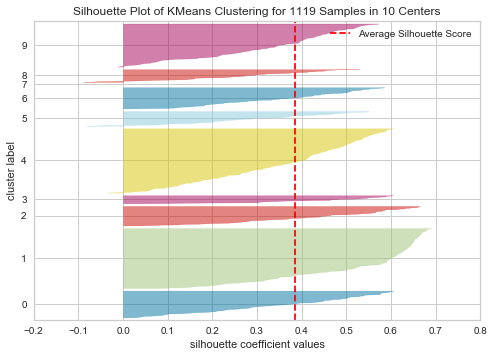

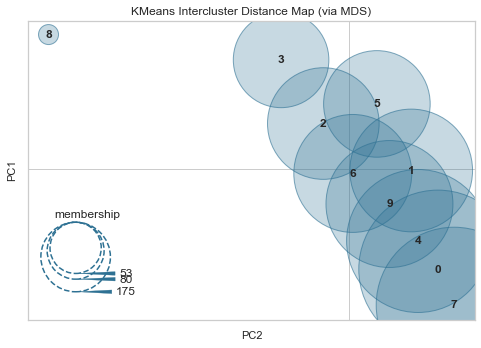

/usr/local/lib/python3.7/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/usr/local/lib/python3.7/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


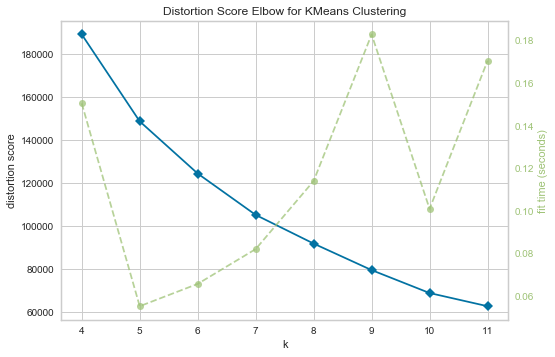

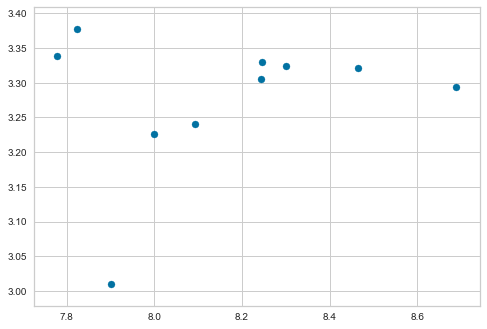

In [63]:
#     k-means clustering

n_clusters = 10
sample_size = len(y_train)

print(82 * '_')
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')

def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(y_train, estimator.labels_),
             metrics.completeness_score(y_train, estimator.labels_),
             metrics.v_measure_score(y_train, estimator.labels_),
             metrics.adjusted_rand_score(y_train, estimator.labels_),
             metrics.adjusted_mutual_info_score(y_train,  estimator.labels_,
                                                average_method='arithmetic'),
             metrics.silhouette_score(x_train, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))

for n in range(2,26):
    bench_k_means(KMeans(init='k-means++', n_clusters=n, n_init=30),
                  name="k-means++ " + str(n), data=x_train)

print(82 * '_')
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each




kmeans = KMeans(init='k-means++', n_clusters=n_clusters, n_init=10)
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(x_train)        # Fit the data to the visualizer
visualizer.show() 

kmeans = KMeans(init='k-means++', n_clusters=n_clusters, n_init=10)
visualizer = InterclusterDistance(kmeans)
visualizer.fit(x_train)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure


kmeans = KMeans(init='k-means++', n_clusters=n_clusters, n_init=10)
visualizer = KElbowVisualizer(kmeans, k=(4,12))
visualizer.fit(x_train)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

kmeans = KMeans(init='k-means++', n_clusters=n_clusters, n_init=10)
kmeans.fit(x_train)
#Z = kmeans.predict(np.c_[x_train, y_train])
X = kmeans.cluster_centers_
plt.scatter(X[:,0],X[:,1], label='True Position')


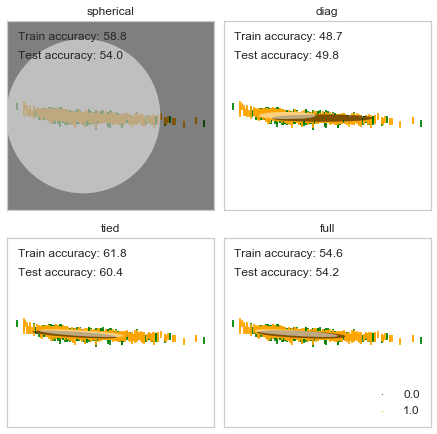

In [67]:
###Expectation Maximization###
def make_ellipses(gmm, ax):
    for n, color in enumerate(colors):
        if gmm.covariance_type == 'full':
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == 'tied':
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == 'diag':
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == 'spherical':
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
                                  180 + angle, color=color)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
        ax.set_aspect('equal', 'datalim')
        
n_classes = len(np.unique(y_train))
colors = ['0.0', '1.0']
a_color = ['green', 'orange']




# Try GMMs using different types of covariances.
estimators = {cov_type: GaussianMixture(n_components=n_classes,
              covariance_type=cov_type, max_iter=200, random_state=0)
              for cov_type in ['spherical', 'diag', 'tied', 'full']}

n_estimators = len(estimators)

plt.figure(figsize=(3 * n_estimators // 2, 6))
plt.subplots_adjust(bottom=.01, top=0.95, hspace=.15, wspace=.05,
                    left=.01, right=.99)

x_train_list = np.array(x_train.values.tolist())
y_train_list = np.array(y_train.values.tolist())
# count = 0
# for i in y_train_list:
#     if(i == 0.0):
#         count = count + 1
# print("count", count)
# print("size", len(y_train_list))
    

for index, (name, estimator) in enumerate(estimators.items()):
    # Since we have class labels for the training data, we can
    # initialize the GMM parameters in a supervised manner.
    estimator.means_init = np.array([x_train[y_train == i].mean(axis=0)
                                    for i in range(n_classes)])

    # Train the other parameters using the EM algorithm.
    estimator.fit(x_train)

    h = plt.subplot(2, n_estimators // 2, index + 1)
    make_ellipses(estimator, h)
    
    for n, color in enumerate(colors):
        data = x_train_list[y_train_list == n]

        plt.scatter(data[:, 0], data[:, 1], s=0.8, color=a_color[int(float(color))],
                    label=colors[n])
    # Plot the test data with crosses
    for n, color in enumerate(colors):
        data = x_train_list[y_train_list == n]
        plt.scatter(data[:, 0], data[:, 1], marker='|', color=a_color[int(float(color))])

    y_train_pred = estimator.predict(x_train)
    train_accuracy = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100
    plt.text(0.05, 0.9, 'Train accuracy: %.1f' % train_accuracy,
             transform=h.transAxes)

    y_test_pred = estimator.predict(x_test)
    test_accuracy = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
    plt.text(0.05, 0.8, 'Test accuracy: %.1f' % test_accuracy,
             transform=h.transAxes)

    plt.xticks(())
    plt.yticks(())
    plt.title(name)

plt.legend(scatterpoints=1, loc='lower right', prop=dict(size=12))


plt.show()

In [ ]:

#     PCA
#     ICA
#     Randomized Projections
#     Any other feature selection algorithm you desire


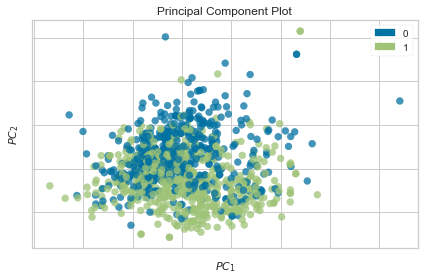

[[-16.822065     3.83665555  -1.82778363]
 [ 48.34332089  -2.70646127  -1.13654184]
 [ -2.64008351  -1.46630901   1.16877276]
 ...
 [-24.8493789    4.62062117  -1.37442284]
 [ 97.10517209 -13.75820173  -0.46466088]
 [ 29.61262051   9.68974053   0.75328863]]
2
Variance score: 0.04 

[1089.2096144    58.79382953]
3
Variance score: 0.03 

[1089.2096144    58.79382953    3.0673283 ]
4
Variance score: 0.03 

[1089.2096144    58.79382953    3.0673283     2.03890254]
5
Variance score: 0.23 

[1.08920961e+03 5.87938295e+01 3.06732830e+00 2.03890254e+00
 9.93836251e-01]
6
Variance score: 0.28 

[1.08920961e+03 5.87938295e+01 3.06732830e+00 2.03890254e+00
 9.93836251e-01 4.07552322e-02]
7
Variance score: 0.29 

[1.08920961e+03 5.87938295e+01 3.06732830e+00 2.03890254e+00
 9.93836251e-01 4.07552322e-02 2.26384106e-02]
8
Variance score: 0.29 

[1.08920961e+03 5.87938295e+01 3.06732830e+00 2.03890254e+00
 9.93836251e-01 4.07552322e-02 2.26384106e-02 1.15718287e-02]
9
Variance score: 0.29 

[1.08920

In [55]:
###PCA###


# Specify the features of interest and the target

# Create a list of colors to assign to points in the plot
colors = np.array(['r' if yi else 'b' for yi in y_train_list])

visualizer = PCADecomposition(scale=True, color=colors)
visualizer.fit_transform(x_train_list, y_train_list)
visualizer.show()


pca = decomposition.PCA(n_components=3)
pca.fit(x_train_list)
x_train_pca = pca.transform(x_train_list)

print(x_train_pca)

for n in range(2, num_of_comp):
        
    pca_t = decomposition.PCA(n_components=n)
    pca_t.fit(x_train_list)
    x_test_pca = pca_t.transform(x_test_list)
    
    pca = decomposition.PCA(n_components=n)
    pca.fit(x_train_list)
    x_train_pca = pca.transform(x_train_list)
    
    regr = linear_model.LinearRegression()
    # Train the model using the training sets
    regr.fit(x_train_pca, y_train_list)

    # Make predictions using the testing set
    reg_y_pred = regr.predict(x_test_pca)
    print(n)
    print('Variance score: %.2f \n' % r2_score(y_test_list, reg_y_pred))
    #print(get_eigen_value(pca_t, x_test_list))
    ###printing eigan values ???
    print(pca_t.explained_variance_)

# The coefficients
###use a regression model to compare different numbers for PCA?


In [ ]:
###ICA###